In [1]:
# dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_real_tabular = pd.read_csv("creditcard.csv")
df_real_tabular.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

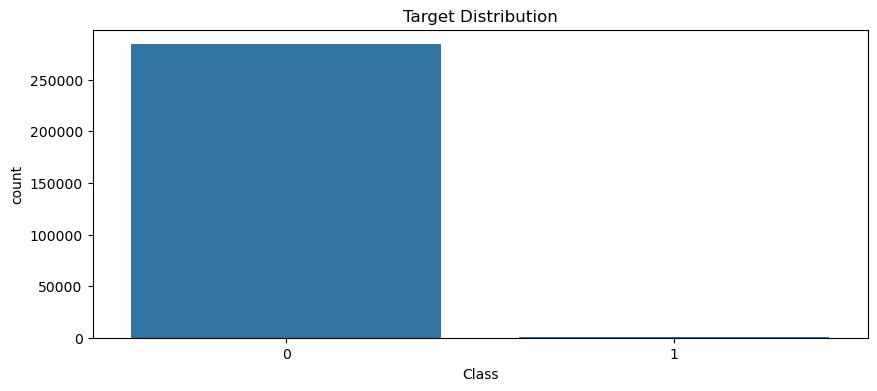

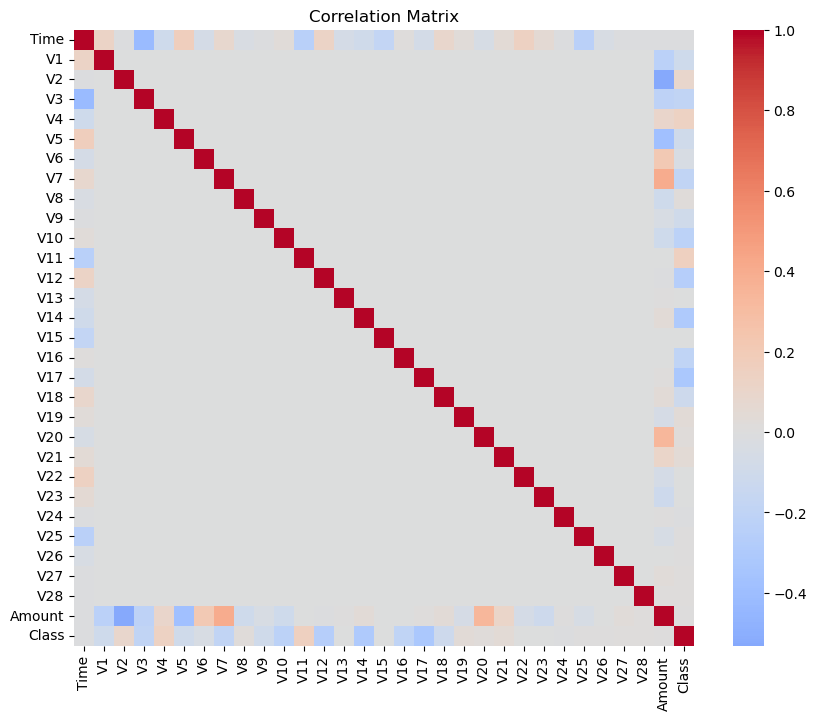

In [3]:
print(df_real_tabular.shape)
print(df_real_tabular.describe())
print(df_real_tabular["Class"].value_counts(normalize=True))

plt.figure(figsize=(10,4))
sns.countplot(x="Class", data=df_real_tabular)
plt.title("Target Distribution")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df_real_tabular[[c for c in df_real_tabular.columns if c.startswith("V") or c in ["Amount","Time","Class"]]].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [4]:
np.random.seed(42)

feature_cols = [c for c in df_real_tabular.columns if c.startswith("V")]
ratio = df_real_tabular["Class"].mean()
n_samples = 5000
n_fraud = max(1, int(n_samples * ratio))
n_legit = n_samples - n_fraud

real_legit = df_real_tabular[df_real_tabular["Class"]==0]
real_fraud = df_real_tabular[df_real_tabular["Class"]==1]

mu0 = real_legit[feature_cols].mean().values
mu1 = real_fraud[feature_cols].mean().values
cov0 = real_legit[feature_cols].cov().values + np.eye(len(feature_cols))*1e-6
cov1 = real_fraud[feature_cols].cov().values + np.eye(len(feature_cols))*1e-6

X0 = np.random.multivariate_normal(mu0, cov0, size=n_legit, check_valid="ignore", tol=1e-8)
X1 = np.random.multivariate_normal(mu1, cov1, size=n_fraud, check_valid="ignore", tol=1e-8)

time0 = np.random.choice(real_legit["Time"].values, size=n_legit, replace=True)
time1 = np.random.choice(real_fraud["Time"].values, size=n_fraud, replace=True)
amt0 = np.random.choice(real_legit["Amount"].values, size=n_legit, replace=True)
amt1 = np.random.choice(real_fraud["Amount"].values, size=n_fraud, replace=True)

df0 = pd.DataFrame(X0, columns=feature_cols)
df1 = pd.DataFrame(X1, columns=feature_cols)
df0["Time"] = time0
df1["Time"] = time1
df0["Amount"] = amt0
df1["Amount"] = amt1
df0["Class"] = 0
df1["Class"] = 1

df_synth_tabular = pd.concat([df0, df1], ignore_index=True)
df_synth_tabular = df_synth_tabular[["Time"]+feature_cols+["Amount","Class"]]
df_synth_tabular.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40818.0,-1.003085,0.245319,-0.648391,-2.194353,-0.256308,-0.482815,-1.561262,1.089146,0.805416,...,1.415387,0.341932,0.132188,-0.029310,0.727111,-0.277751,-0.032387,-0.128871,14.50,0
1,44477.0,1.092947,0.521046,0.803785,-2.016225,-1.230254,-1.555375,-1.849626,-1.364259,-0.868471,...,-0.095000,-0.805176,1.078582,-0.194921,0.203424,-0.314875,0.310257,-0.307694,154.00,0
2,127789.0,1.663850,0.506847,-0.045123,-1.590591,0.497807,-0.276861,0.938457,-1.447585,-0.675045,...,-0.064547,-0.562104,0.177547,-0.058989,1.039981,-0.092624,0.208605,0.164115,69.88,0
3,65392.0,1.549270,0.915186,-0.972653,-0.947761,0.865997,0.603073,0.032773,1.105216,0.673507,...,0.192161,0.542022,-0.241920,-1.140435,-0.096401,0.105401,-0.123949,0.011566,4.99,0
4,44348.0,-0.063712,-3.920386,-0.534101,0.027855,-0.676939,-1.688245,-1.586450,0.916456,-1.043187,...,-0.549138,0.319857,-0.288930,0.554758,-0.803798,-0.367945,-0.067653,0.411188,1.79,0


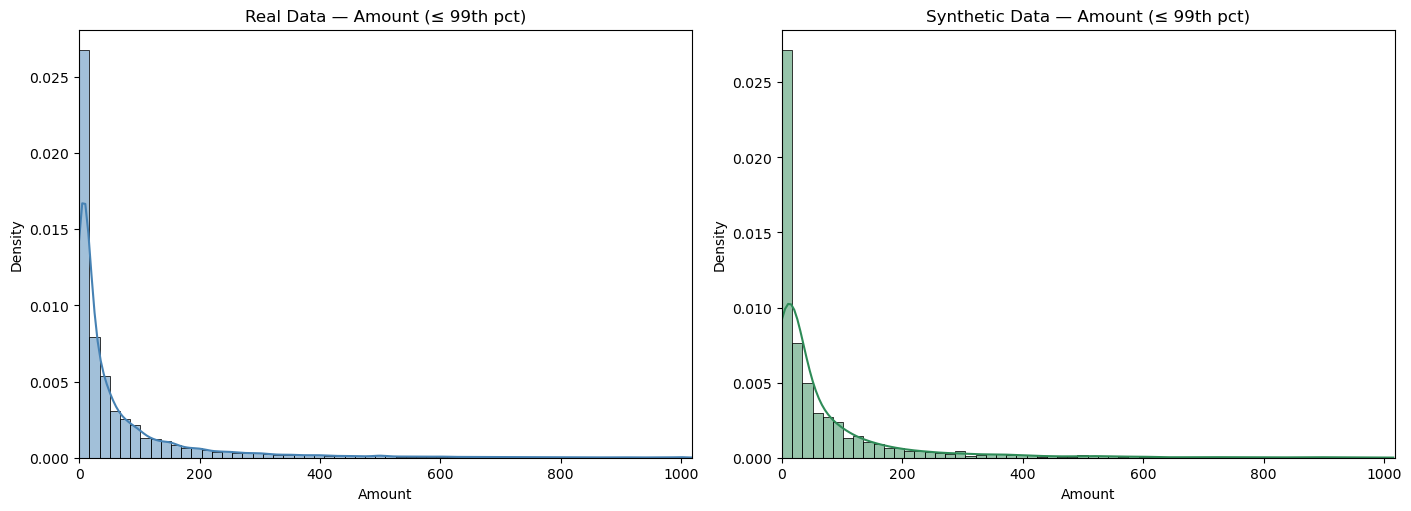

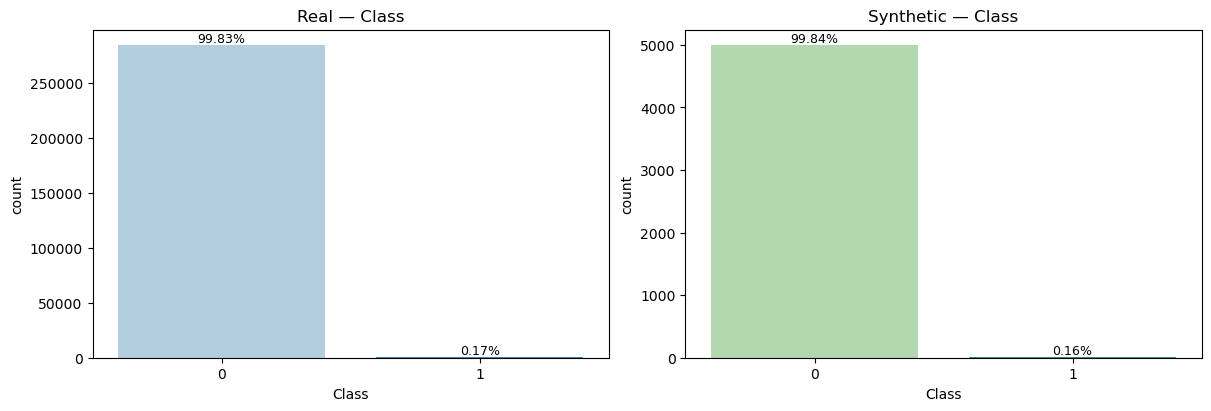

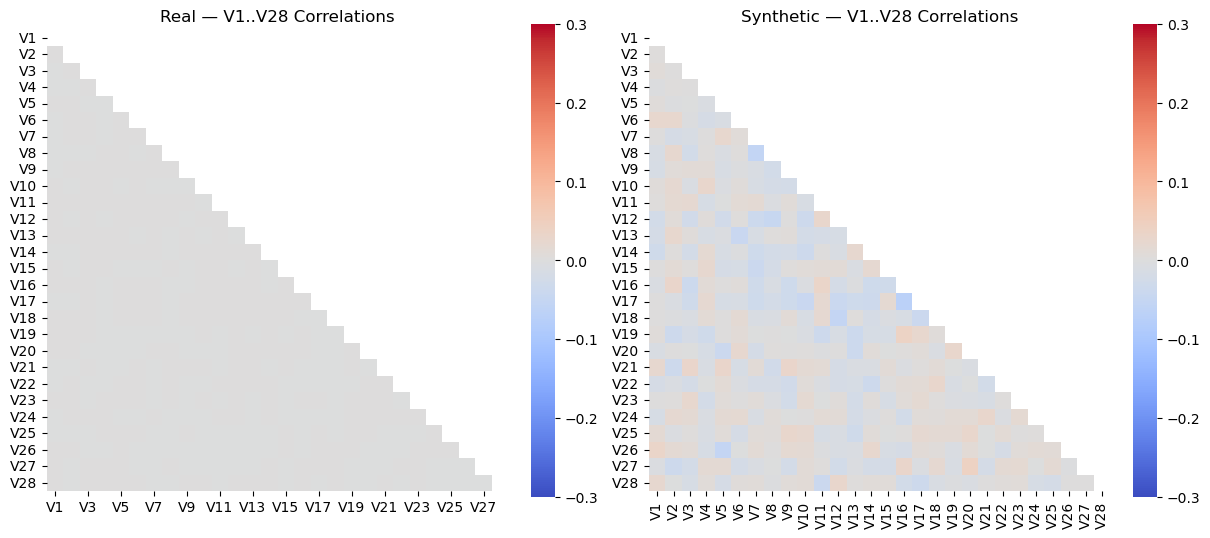

In [5]:
q_real = df_real_tabular["Amount"].quantile(0.99)
q_syn = df_synth_tabular["Amount"].quantile(0.99)
xmax = float(max(q_real, q_syn))

fig, axes = plt.subplots(1,2, figsize=(14,5), constrained_layout=True)
sns.histplot(df_real_tabular.loc[df_real_tabular["Amount"]<=xmax, "Amount"], bins=60, kde=True, ax=axes[0], color="steelblue", stat="density")
axes[0].set_xlim(0, xmax)
axes[0].set_title("Real Data — Amount (≤ 99th pct)")
sns.histplot(df_synth_tabular.loc[df_synth_tabular["Amount"]<=xmax, "Amount"], bins=60, kde=True, ax=axes[1], color="seagreen", stat="density")
axes[1].set_xlim(0, xmax)
axes[1].set_title("Synthetic Data — Amount (≤ 99th pct)")
plt.show()

fig, axes = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)
sns.countplot(x="Class", data=df_real_tabular, ax=axes[0], palette="Blues")
axes[0].set_title("Real — Class")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()/len(df_real_tabular):.2%}", (p.get_x()+p.get_width()/2, p.get_height()), ha="center", va="bottom", fontsize=9)
sns.countplot(x="Class", data=df_synth_tabular, ax=axes[1], palette="Greens")
axes[1].set_title("Synthetic — Class")
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height()/len(df_synth_tabular):.2%}", (p.get_x()+p.get_width()/2, p.get_height()), ha="center", va="bottom", fontsize=9)
plt.show()

corr_real = df_real_tabular[[c for c in df_real_tabular.columns if c.startswith("V")]].corr()
corr_syn = df_synth_tabular[[c for c in df_synth_tabular.columns if c.startswith("V")]].corr()
mask = np.triu(np.ones_like(corr_real, dtype=bool))

fig, axes = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
sns.heatmap(corr_real, mask=mask, cmap="coolwarm", center=0, vmin=-0.3, vmax=0.3, square=True, cbar_kws={"shrink":0.8}, ax=axes[0])
axes[0].set_title("Real — V1..V28 Correlations")
sns.heatmap(corr_syn, mask=mask, cmap="coolwarm", center=0, vmin=-0.3, vmax=0.3, square=True, cbar_kws={"shrink":0.8}, ax=axes[1])
axes[1].set_title("Synthetic — V1..V28 Correlations")
plt.show()

In [6]:
from scipy.stats import ks_2samp, wasserstein_distance

ks_amount = ks_2samp(df_real_tabular["Amount"].values, df_synth_tabular["Amount"].values)
wd_amount = wasserstein_distance(df_real_tabular["Amount"].values, df_synth_tabular["Amount"].values)

real_class = df_real_tabular["Class"].value_counts(normalize=True).sort_index()
synth_class = df_synth_tabular["Class"].value_counts(normalize=True).sort_index()

real_corr = df_real_tabular[feature_cols].corr().values
synth_corr = df_synth_tabular[feature_cols].corr().values
corr_diff_fro = np.linalg.norm(real_corr - synth_corr, ord="fro")

real_stats = pd.DataFrame({"mean": df_real_tabular[feature_cols].mean(), "std": df_real_tabular[feature_cols].std()})
synth_stats = pd.DataFrame({"mean": df_synth_tabular[feature_cols].mean(), "std": df_synth_tabular[feature_cols].std()})
mean_mae = (real_stats["mean"] - synth_stats["mean"]).abs().mean()
std_mae = (real_stats["std"] - synth_stats["std"]).abs().mean()

print("KS test (Amount):", ks_amount)
print("Wasserstein distance (Amount):", wd_amount)
print("Class distribution (real):", real_class.to_dict())
print("Class distribution (synthetic):", synth_class.to_dict())
print("Correlation Frobenius diff (V1..V28):", corr_diff_fro)
print("Mean MAE across V1..V28:", mean_mae)
print("Std MAE across V1..V28:", std_mae)

KS test (Amount): KstestResult(statistic=0.012687082129301586, pvalue=0.40424666261310893, statistic_location=23.08, statistic_sign=-1)
Wasserstein distance (Amount): 5.689541517413133
Class distribution (real): {0: 0.9982725143693799, 1: 0.001727485630620034}
Class distribution (synthetic): {0: 0.9984, 1: 0.0016}
Correlation Frobenius diff (V1..V28): 0.4986720689198721
Mean MAE across V1..V28: 0.011557425968504379
Std MAE across V1..V28: 0.010292940411760666


In [7]:
#df_real_tabular.to_csv("real_fraud_data.csv", index=False)
#df_synth_tabular.to_csv("synthetic_fraud_data.csv", index=False)